# Final Project: Credit Card Fraud
author: Rachel Nelson

class: DSC530-T303 Data Exploration and Analysis (2211-1)


### Question:

What are factors that correlate to fraud? Can you use those factors to create predictions on which credit card transactions are fraudulent?

### Result Summary:

In [140]:
import numpy as np
import thinkplot
import pandas as pd
import thinkstats2
import statistics
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [74]:
data = pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
#summary statistics that give count, mean, std, min, max of each factor
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [67]:
fraud = data[data.Class == 1]
others = data[data.Class != 1]

# Counts fraud and non fraud then divides the two and prints result
n = len(fraud)
d = len(others)
p = (n/(n+d)*100)
print("{:.2f}".format(p),'% of the transactions are fraud')

0.17 % of the transactions are fraud


Text(0, 0.5, 'Frequency')

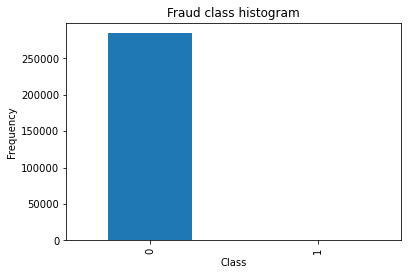

In [77]:
data_hist = pd.value_counts(data['Class'], sort = True).sort_index()
data_hist.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


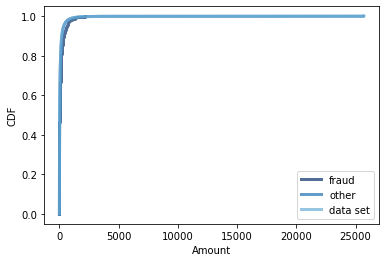

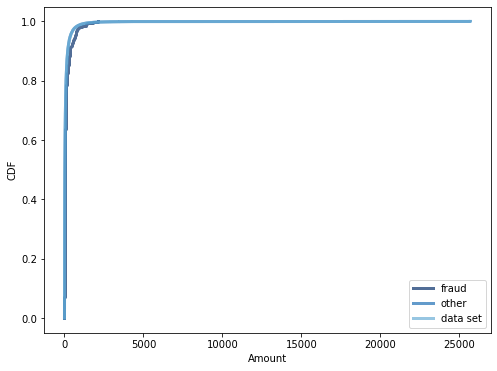

<Figure size 576x432 with 0 Axes>

In [16]:
thinkplot.PrePlot(3)
thinkplot.Cdfs([fraud_cdf, other_cdf, data_cdf])
thinkplot.Config(xlabel='Amount', ylabel='CDF')
thinkplot.show()

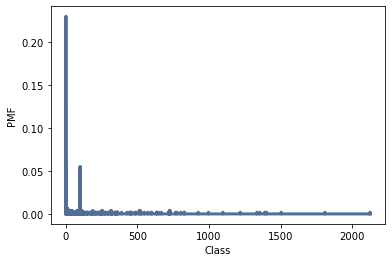

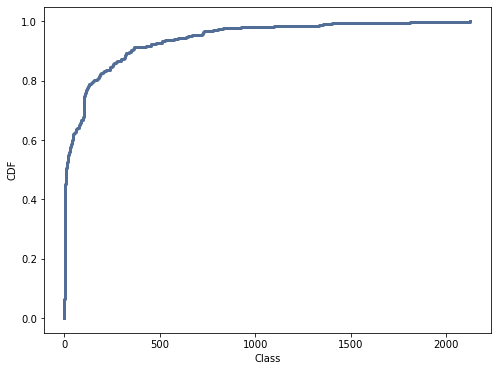

Because the CDF is not a straight line, the distribution is not uniform


<Figure size 576x432 with 0 Axes>

In [87]:
#plots the Probability Mass FUnction PMF of the random numbers
pmf = thinkstats2.Pmf(fraud.Amount)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Class', ylabel='PMF')
thinkplot.show()

#plots the CDF of the random numbers
cdf = thinkstats2.Cdf(fraud.Amount)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Class', ylabel='CDF')
thinkplot.show()

print("Because the CDF is not a straight line, the distribution is not uniform")

Since our distribution is not proportioned between fraud and non-fraud cases, we will need to resize the data.

In [95]:
random.seed(30)
# Get random sample of 492 records from non-fraud
others_s = others.sample(492)
others_s.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,95240.209350,0.055822,0.059700,0.099603,0.058117,0.088125,0.037555,0.050379,0.016587,-0.039999,...,0.010337,0.013127,-0.024232,0.034994,-0.008293,-0.037461,0.009558,-0.014789,75.617175,0.0
std,48201.293185,1.587892,1.156353,1.350628,1.444198,1.098775,1.260850,0.861499,0.835275,1.090004,...,0.545867,0.686975,0.429803,0.616884,0.498322,0.491474,0.263685,0.235364,160.574386,0.0
min,446.000000,-7.818051,-7.192104,-4.233010,-4.938824,-3.988848,-3.325959,-2.818384,-7.135379,-2.777523,...,-1.367230,-2.332167,-4.815431,-2.409839,-2.888726,-1.413286,-1.999548,-1.938737,0.000000,0.0
25%,53885.750000,-0.945130,-0.502774,-0.696922,-0.817866,-0.624234,-0.731862,-0.526615,-0.175566,-0.709159,...,-0.227158,-0.481232,-0.165509,-0.309646,-0.299391,-0.374011,-0.073309,-0.050157,5.990000,0.0
50%,87731.000000,-0.005733,0.108824,0.206300,0.089931,-0.026612,-0.227324,0.028268,0.008189,-0.088449,...,-0.023551,0.044388,-0.018827,0.061166,0.007776,-0.090044,0.006249,0.008677,24.435000,0.0
75%,139110.500000,1.269348,0.744375,0.992649,0.838397,0.633263,0.429755,0.551759,0.322567,0.562963,...,0.172262,0.554068,0.137459,0.447854,0.316288,0.229173,0.091797,0.073920,69.990000,0.0
max,172617.000000,2.338738,4.593744,3.569306,5.084717,3.908648,5.007848,4.502206,3.569309,5.343173,...,4.475672,1.547016,2.655916,3.265103,1.817993,2.421941,1.544115,0.929726,1331.670000,0.0


In [120]:
df = [fraud, others_s]
df = pd.concat(df)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87993.508130,-2.358063,1.841739,-3.466839,2.300073,-1.531550,-0.680091,-2.759176,0.293611,-1.310561,...,0.361963,0.013588,-0.032270,-0.035068,0.016578,0.007094,0.090067,0.030439,98.914248,0.500000
std,48538.807597,5.484340,3.611743,6.237036,3.193282,4.200724,1.741883,5.849334,4.848407,2.309433,...,2.784016,1.162544,1.157023,0.572510,0.664906,0.483493,0.993980,0.423473,215.248461,0.500254
min,406.000000,-30.552380,-8.402154,-31.103685,-4.938824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.409839,-4.781606,-1.413286,-7.263482,-1.938737,0.000000,0.000000
25%,47006.500000,-2.788129,-0.123455,-5.074851,-0.015897,-1.706343,-1.576412,-3.031843,-0.180564,-2.294075,...,-0.165459,-0.516574,-0.235247,-0.374782,-0.308930,-0.308940,-0.065924,-0.057893,1.582500,0.000000
50%,80277.500000,-0.797976,0.896263,-1.308615,1.347915,-0.433980,-0.638118,-0.604300,0.148882,-0.751562,...,0.145135,0.044744,-0.038251,0.014332,0.051467,-0.042584,0.053963,0.034179,19.245000,0.500000
75%,134766.750000,0.998242,2.793742,0.390807,4.270784,0.488004,0.103392,0.260803,0.860635,0.113260,...,0.645320,0.591093,0.188502,0.379952,0.386652,0.303900,0.427901,0.208837,99.922500,1.000000
max,172617.000000,2.338738,22.057729,3.569306,12.114672,11.095089,6.474115,5.802537,20.007208,5.343173,...,27.202839,8.361985,5.466230,3.265103,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


Text(0, 0.5, 'Frequency')

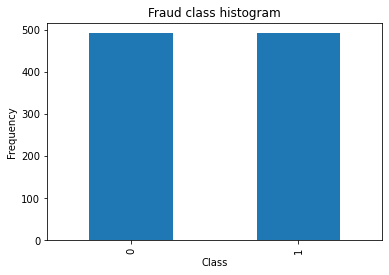

In [100]:
data_hist = pd.value_counts(df['Class'], sort = True).sort_index()
data_hist.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

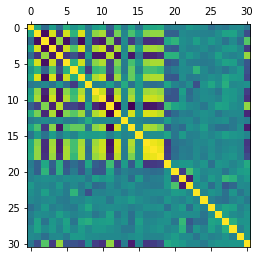

In [112]:
corrMatrix = df.corr()
corrMatrix = corrMatrix.sort_values(by=['Class'], ascending=True)
corrMatrix.to_csv(r'Credit_Card_Corr.csv', index = True)
corrMatrix

plt.matshow(df.corr())
plt.show()

In [123]:
rs = np.random.RandomState(0)
df2 = pd.DataFrame(rs.rand(31, 31))
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1.000000,-0.133318,0.304807,-0.459985,-0.136822,0.148664,-0.547934,0.093624,-0.389890,0.041253,0.155979,-0.094499,-0.066201,-0.126722,-0.060315,-0.024168,0.122723,-0.209588,-0.048422,0.394179,-0.169034,0.571090,-0.144936,-0.077140,-0.342711,0.021893,0.170162,-0.404857,-0.058999,0.017564,0.070066
1,-0.133318,1.000000,0.153898,0.023601,0.060375,0.333946,0.245015,0.013307,-0.066330,-0.169618,-0.005132,0.087146,-0.019023,0.154922,-0.324555,0.065379,-0.152238,-0.081070,-0.094615,0.123937,-0.036659,-0.145605,0.002442,0.251924,-0.262430,-0.128951,-0.040252,0.140831,-0.180127,0.073053,0.075956
2,0.304807,0.153898,1.000000,0.084533,0.127656,-0.123331,-0.068427,0.283280,-0.093308,-0.041952,-0.140375,0.210436,-0.018026,-0.027208,-0.162246,0.127185,-0.165866,-0.279939,-0.071465,0.172208,0.220880,0.128031,0.374877,-0.147514,-0.114031,-0.234933,0.270225,-0.236191,0.069913,-0.170146,0.234576
3,-0.459985,0.023601,0.084533,1.000000,-0.068761,-0.080911,0.149973,0.045344,0.189875,-0.063319,-0.005231,-0.229868,-0.021130,-0.011393,-0.212381,0.025397,-0.305722,-0.117180,0.213544,-0.073311,0.191217,-0.239972,0.514536,0.082982,0.029144,-0.047216,0.083039,0.243619,0.251315,0.076332,0.470179
4,-0.136822,0.060375,0.127656,-0.068761,1.000000,-0.029194,0.338224,-0.042698,0.162670,-0.213182,-0.079717,0.344506,0.188554,-0.408007,0.036517,0.141676,0.085387,-0.058344,-0.408658,-0.014909,0.031258,0.136430,-0.045030,-0.307965,0.020758,-0.128272,-0.130453,-0.037679,0.032384,-0.239753,0.026636
5,0.148664,0.333946,-0.123331,-0.080911,-0.029194,1.000000,-0.087314,-0.057108,-0.325502,0.060258,0.031063,0.109627,0.073393,0.104470,0.021555,0.002414,0.143704,-0.041634,0.004807,0.292010,-0.144267,0.403685,0.039274,0.003024,-0.284603,0.093489,0.164078,0.057084,0.002946,0.111481,0.042605
6,-0.547934,0.245015,-0.068427,0.149973,0.338224,-0.087314,1.000000,-0.309199,0.174061,-0.061399,0.135590,0.244402,0.153201,0.157318,-0.061688,0.066967,-0.150491,-0.118112,-0.294356,-0.177943,-0.227614,-0.388827,0.139166,-0.042438,-0.004579,-0.338798,-0.198718,0.461656,0.106058,-0.157360,-0.031919
7,0.093624,0.013307,0.283280,0.045344,-0.042698,-0.057108,-0.309199,1.000000,0.106160,0.073970,-0.007396,-0.104867,0.015916,0.347598,0.246325,-0.000512,-0.252186,-0.265628,-0.113269,0.183654,0.466449,0.210531,0.105377,-0.171941,0.142490,-0.178260,0.088618,-0.350737,-0.177835,-0.107670,-0.146735
8,-0.389890,-0.066330,-0.093308,0.189875,0.162670,-0.325502,0.174061,0.106160,1.000000,0.036225,0.028255,0.036212,0.071117,0.088684,0.028628,-0.127632,-0.458420,0.133978,-0.073349,-0.610527,0.100774,-0.350677,0.004962,-0.046882,0.118137,-0.053788,-0.226853,-0.148790,0.025082,-0.012573,-0.183990
9,0.041253,-0.169618,-0.041952,-0.063319,-0.213182,0.060258,-0.061399,0.073970,0.036225,1.000000,0.268179,-0.011745,0.037384,-0.070215,-0.195032,-0.233283,0.183709,-0.202972,0.012071,0.017671,-0.124221,0.009115,0.039349,0.490154,-0.045775,-0.016700,0.091918,0.175049,-0.149477,0.114964,-0.165271


Based on the correlation matrix, the items that are most coorelated to fraud are:
* V4	0.702
* V11	0.69
* V10	-0.63
* V12	-0.68
* V14	-0.75

In [137]:
formula = ('Class ~ V4 + V14 + V11 + V12 + V10')
results = smf.ols(formula, data=df).fit()
print(results)